In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import matplotlib.pyplot as plt
from src.config import get_dataset_and_user
%matplotlib inline

In [2]:
# get data
X_iris, user_iris = get_dataset_and_user('iris')
y_iris = user_iris.get_label(X_iris, update_counter=False)

X_housing, user_housing = get_dataset_and_user('housing')
y_housing = user_housing.get_label(X_housing, update_counter=False)

In [3]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
clf = LinearSVC(C=1000, fit_intercept=True)
clf.fit(X_iris,y_iris)
f1_score(clf.predict(X_iris), y_iris)

1.0

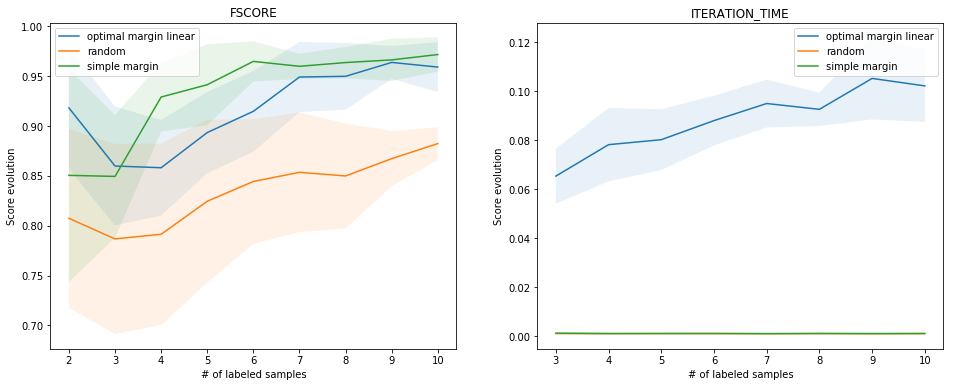

In [8]:
from src.active_learning.svm import SimpleMargin, SolverMethod, OptimalMargin
from src.active_learning.linear import LinearMajorityVote
from src.active_learning.agnostic import RandomLearner
from src.initial_sampling import FixedSizeStratifiedSampler
from src.showdown import Showdown
from src.plotting import plot_showdown

user_housing.max_iter = 25
user_iris.max_iter = 10

active_learners_list = [
     ("random", RandomLearner(LinearSVC(C=1000, fit_intercept=False))),
     ("simple margin", SimpleMargin(kind='kernel', kernel='rbf', C=1000)),
     ('optimal margin rbf', OptimalMargin(C=1000, kind='kernel', kernel='rbf', chain_length=100)),
     #('RBF optimal margin', OptimalMargin(C=1000, chain_length=100))
     #('linear majority', LinearMajorityVote(1000)),
     #("rbfSVM", SimpleMargin(C=1000, kernel='rbf')),
     #("solver5", SolverMethod(pool_size=5, C=1000, kernel='linear')),
     #("solver10", SolverMethod(pool_size=10, C=1000, kernel='linear')),
     #("solver20", SolverMethod(pool_size=20, C=1000, kernel='linear'))
     #("actboost", ActBoost(chain_length=100, sample_size=16, n_iterations=500)),
     #("random", RandomLearner(Adaboost(n_iterations=500))),
     #("qbb", QueryByBoosting(n_iterations=500)), 
]

datasets_list = [
    #("housing", X_housing, user_housing),
    ("iris", X_iris, user_iris),
    #("polygon1", X_pol, user_pol),
    #("mushroom", X_mush, user_mush),
    #("dermatology", X_derm, user_derm)
]

times = 10
initial_sampler = FixedSizeStratifiedSampler(sample_size=2)
showdown = Showdown(times, initial_sampler)
output = showdown.run(datasets_list, active_learners_list)

#print(output.head())
plot_showdown(output, times, metrics_list=['fscore', 'iteration_time'])

## Next steps
    - add logging
    - label points prematurely based on whether they cut the current version space or not (cut estimate = # samples)
    - add offset (add column of 1's ?) -> works on above cases. Should test on sdss also.
    - change classifier to average of sampled w's (similar to majority vote in ALuMa)
    - add sdss queries
    - initial sampling: use sampling to pick k points which closely cut the VS in 1/2^k proportion / probability of each region close to uniform (entropy criteria?). Can we avoid enumerating all k subsets?
    - start using majoirity vote until 1 pos and 1 neg point have been found?
    
    
    - dozens of labeled samples, low selectivity
    - Problems: categorical attibutes, few positive samples, noise 
    - try queries from sdss paper (user rbf kernel) -> see if these algorithms work better than simple margin 